In [55]:
import json
import pandas as pd
from matplotlib.pyplot import title

with open("../input_size-1.json") as f:
    data = json.load(f)
    df = pd.json_normalize(data)

df['consumption_results.gpu_energy.joules'] = df['consumption_results.gpu_energy'] * 3600000
df

,subquestion_id,subquestion_metrics_path,id,name,description,metric_results,timestamp,consumption_results.cloud_provider,consumption_results.cloud_region,consumption_results.codecarbon_version,...,consumption_results.pue,consumption_results.python_version,consumption_results.ram_energy,consumption_results.ram_power,consumption_results.ram_total_size,consumption_results.region,consumption_results.run_id,consumption_results.timestamp,consumption_results.tracking_mode,consumption_results.gpu_energy.joules
0,input_size,experiments/context_window/input_size/tests.json,100,100:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000030,35.365026,94.306736,NaN,d1347236-0e97-46a7-b0a3-61f0b9d88dd2,2025-03-28T12:44:15,machine,248.446862
1,input_size,experiments/context_window/input_size/tests.json,500,500:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000049,35.365026,94.306736,NaN,e9431b2a-0d20-4804-8416-a2bf6de73249,2025-03-28T12:44:22,machine,451.601068
2,input_size,experiments/context_window/input_size/tests.json,1000,1000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000057,35.365026,94.306736,NaN,a8310493-a552-414a-bab3-014c6ecaffa7,2025-03-28T12:44:29,machine,489.878349
3,input_size,experiments/context_window/input_size/tests.json,2000,2000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000083,35.365026,94.306736,NaN,a238453e-d493-4f85-82ce-2db34a958493,2025-03-28T12:44:39,machine,749.140712
4,input_size,experiments/context_window/input_size/tests.json,3000,3000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000110,35.365026,94.306736,NaN,2d195b0b-23f0-45eb-95ae-339e1b266859,2025-03-28T12:44:51,machine,973.090977
5,input_size,experiments/context_window/input_size/tests.json,4000,4000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000139,35.365026,94.306736,NaN,3318ae8a-1a0c-4656-b014-74a9c189845c,2025-03-28T12:45:07,machine,1272.448437
6,input_size,experiments/context_window/input_size/tests.json,5000,5000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000168,35.365026,94.306736,NaN,96360770-dcf3-4423-868f-acddd6084c2e,2025-03-28T12:45:25,machine,1525.964711
7,input_size,experiments/context_window/input_size/tests.json,10000,10000:lma,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000307,35.365026,94.306736,NaN,4152d3a6-6c65-488c-a86b-a57b3a9ec34f,2025-03-28T12:46:42,machine,2784.076860
8,input_size,experiments/context_window/input_size/tests.json,20000,20000:lma,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000605,35.365026,94.306736,NaN,4ca78cce-5729-4109-90c8-f6d2d3e798c7,2025-03-28T12:47:45,machine,5462.122786
9,input_size,experiments/context_window/input_size/tests.json,100,100:pyt,A test to see if energy readings change based ...,[],2025-03-28T13:00:26.460749,gcp,europe-west4,2.2.2,...,1,3.11.0,0.000019,35.365026,94.306736,NaN,657a855c-aa26-4cf1-9349-dc0d4d3670f7,2025-03-28T13:00:29,machine,166.800622


In [56]:
def get_model(row):
    name = row['name']
    name = name.split(":")[1]
    match name:
        case "pyt":
            return "pythia"
        case "lma":
            return "llama"
        case "llama":
            return "llama"

df["model"] =  df.apply(lambda x: get_model(x), axis=1)

In [57]:
df2 = pd.read_csv("./token_length.csv")
df['id'] = df['id'].astype(int)
df = df.merge(df2, on="id", how="left")

In [58]:
df['gpu_energy.divided'] = df['consumption_results.gpu_energy.joules'] / df['mean']

In [59]:
df

,subquestion_id,subquestion_metrics_path,id,name,description,metric_results,timestamp,consumption_results.cloud_provider,consumption_results.cloud_region,consumption_results.codecarbon_version,...,consumption_results.ram_total_size,consumption_results.region,consumption_results.run_id,consumption_results.timestamp,consumption_results.tracking_mode,consumption_results.gpu_energy.joules,model,mean,std,gpu_energy.divided
0,input_size,experiments/context_window/input_size/tests.json,100,100:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,d1347236-0e97-46a7-b0a3-61f0b9d88dd2,2025-03-28T12:44:15,machine,248.446862,llama,24.39,4.417356,10.186423
1,input_size,experiments/context_window/input_size/tests.json,500,500:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,e9431b2a-0d20-4804-8416-a2bf6de73249,2025-03-28T12:44:22,machine,451.601068,llama,110.37,14.053760,4.091701
2,input_size,experiments/context_window/input_size/tests.json,1000,1000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,a8310493-a552-414a-bab3-014c6ecaffa7,2025-03-28T12:44:29,machine,489.878349,llama,215.22,25.423913,2.276175
3,input_size,experiments/context_window/input_size/tests.json,2000,2000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,a238453e-d493-4f85-82ce-2db34a958493,2025-03-28T12:44:39,machine,749.140712,llama,406.62,28.606272,1.842361
4,input_size,experiments/context_window/input_size/tests.json,3000,3000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,2d195b0b-23f0-45eb-95ae-339e1b266859,2025-03-28T12:44:51,machine,973.090977,llama,610.41,37.709976,1.594160
5,input_size,experiments/context_window/input_size/tests.json,4000,4000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,3318ae8a-1a0c-4656-b014-74a9c189845c,2025-03-28T12:45:07,machine,1272.448437,llama,802.95,48.202304,1.584717
6,input_size,experiments/context_window/input_size/tests.json,5000,5000:llama,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,96360770-dcf3-4423-868f-acddd6084c2e,2025-03-28T12:45:25,machine,1525.964711,llama,1015.91,62.553265,1.502067
7,input_size,experiments/context_window/input_size/tests.json,10000,10000:lma,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,4152d3a6-6c65-488c-a86b-a57b3a9ec34f,2025-03-28T12:46:42,machine,2784.076860,llama,2009.56,132.797889,1.385416
8,input_size,experiments/context_window/input_size/tests.json,20000,20000:lma,A test to see if energy readings change based ...,[],2025-03-28T12:43:48.387231,gcp,europe-west4,2.2.2,...,94.306736,NaN,4ca78cce-5729-4109-90c8-f6d2d3e798c7,2025-03-28T12:47:45,machine,5462.122786,llama,4009.61,128.393563,1.362258
9,input_size,experiments/context_window/input_size/tests.json,100,100:pyt,A test to see if energy readings change based ...,[],2025-03-28T13:00:26.460749,gcp,europe-west4,2.2.2,...,94.306736,NaN,657a855c-aa26-4cf1-9349-dc0d4d3670f7,2025-03-28T13:00:29,machine,166.800622,pythia,24.39,4.417356,6.838894


In [ ]:
df.set_index('mean', inplace=True)


model
llama     Axes(0.125,0.11;0.775x0.77)
pythia    Axes(0.125,0.11;0.775x0.77)
Name: gpu_energy.divided, dtype: object

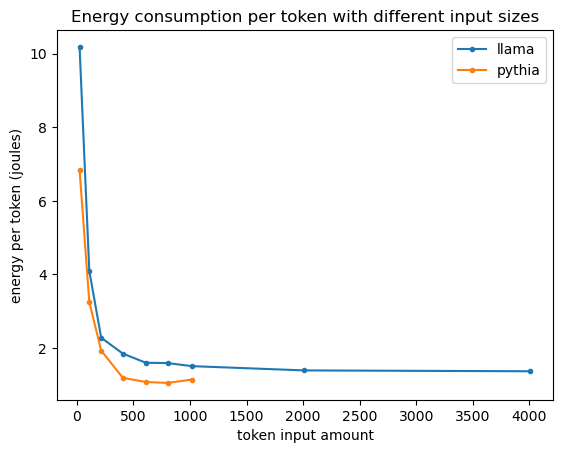

In [62]:
df.groupby('model')['gpu_energy.divided'].plot(
    legend=True,
    xlabel='token input amount',
    ylabel='energy per token (joules)',
    rot=0,
    title='Energy consumption per token with different input sizes',
    style='.-',
)